**Perform Comparative evaluation of Naïve Bayes, Decision Tree, Random Forest, and  Support Vector Machine classifier. Use diabetes and hear disease datasets**

## Loading the Required Libaries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Using Diabetes Dataset

Reading the CSV File as a Pandas DataFrame

In [2]:
df = pd.read_csv('data/diabetes.csv')

Checking the first few rows

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Plotting the Bar Graph of Target Class

Text(0.5, 1.0, 'Bar Plot of Target Class')

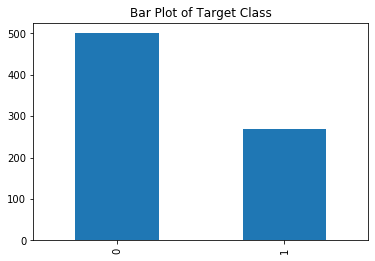

In [4]:
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Target Class')

Checking if there is null values in the dataset

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no an null values in the dataset

Train Test Split

In [6]:
X = df.drop(columns=['Outcome'],axis=1)
y = df['Outcome']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

A helper function that runs all the machine models and gives the evaluation matrices as output

In [8]:
def run_exps(X_train, y_train, X_test, y_test):
    dfs = []
    # Defining the Models and adding them to a list
    models = [
        ('NaiveBayes',GaussianNB()),
        ('DecisionTree',DecisionTreeClassifier()),
        ('RandomForest', RandomForestClassifier()),
        ('SVM', SVC()) 
        
    ]
    results = []
    names = []
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    target_names = ['0','1']
    # Looping through Each Model in the list and making prediction to get evaluation matrices
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print("#####################")
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        plot_confusion_matrix(clf, X_test, y_test)
        plt.title(name)
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final

#####################
NaiveBayes
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

#####################
DecisionTree
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       107
           1       0.60      0.70      0.65        47

    accuracy                           0.77       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.78      0.77      0.77       154

#####################
RandomForest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77  

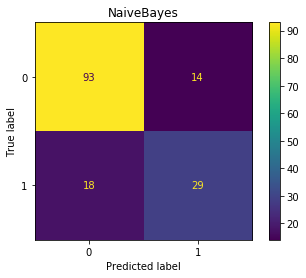

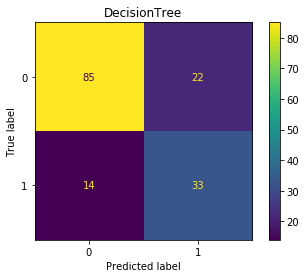

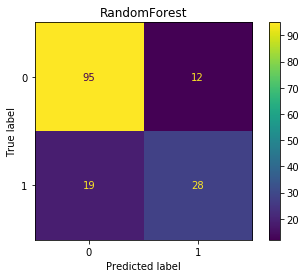

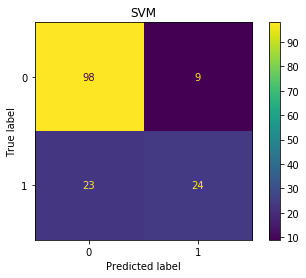

In [9]:
r_df = run_exps(X_train,y_train,X_test,y_test)

Getting the Average of Each Matrices from K-Fold CV of each Model

In [10]:
r_df.groupby('model').mean().reset_index()

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,DecisionTree,0.004315,0.004933,0.698707,0.585716,0.558024,0.565386
1,NaiveBayes,0.004870,0.007758,0.747621,0.669703,0.600590,0.632148
2,RandomForest,0.186305,0.019301,0.750846,0.687880,0.568713,0.621267
3,SVM,0.011196,0.008482,0.741090,0.710155,0.470610,0.564164


From the above results we can say that RandomForest is the best model on the basis of accuracy.

# Using Heart Disease Dataset

Reading the CSV File as a Pandas DataFrame

In [11]:
df = pd.read_csv('data/heart.csv')

Checking First few rows of the dataset

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Converting the `sex` feature to categorical

In [13]:
df['sex'] = df['sex'].astype('category')

Checking for missing values in the dataset

In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing values in the dataset

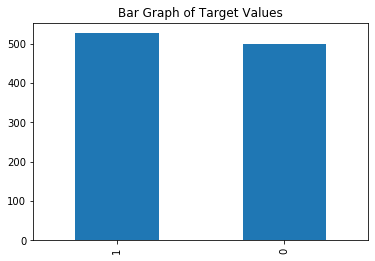

In [15]:
df['target'].value_counts().plot(kind='bar')
plt.title('Bar Graph of Target Values')
plt.show()

Train Test Split

In [16]:
X = df.drop(columns=['target'])
y = df['target']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

Calling the Helper Function

#####################
NaiveBayes
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       145
           1       0.84      0.87      0.86       163

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308

#####################
DecisionTree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

#####################
RandomForest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.98      0.99       163

    accuracy                           0.99       308
   macro avg       0.99  

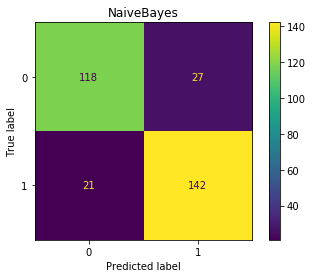

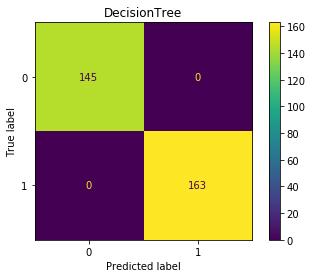

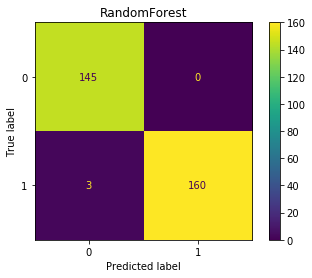

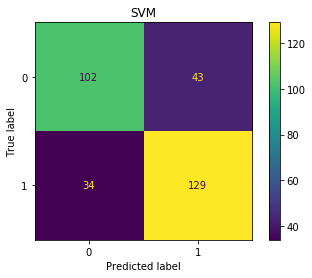

In [18]:
r_df = run_exps(X_train,y_train,X_test,y_test)

Getting Average score from K-Fold CV result for each model

In [19]:
r_df.groupby('model').mean().reset_index()

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,DecisionTree,0.003666,0.004892,0.972067,0.976604,0.965967,0.971049
1,NaiveBayes,0.004914,0.006603,0.811694,0.796276,0.842783,0.818564
2,RandomForest,0.193031,0.021173,0.969279,0.973574,0.962835,0.967949
3,SVM,0.019332,0.011124,0.694610,0.685327,0.742913,0.710625


From the result above we can say that Random Forest is the best model as the values of accuracy, precision and recall is the highest.